In [34]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np 
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from aind_behavior_gym.dynamic_foraging.task import (CoupledBlockTask,
                                                     RandomWalkTask,
                                                     UncoupledBlockTask)
from aind_dynamic_foraging_models import generative_model
from aind_dynamic_foraging_models.generative_model import ForagerCollection
from aind_dynamic_foraging_models.generative_model.params import ParamsSymbols
from aind_dynamic_foraging_models.generative_model.params.util import get_params_options
from aind_dynamic_foraging_basic_analysis import compute_foraging_efficiency


sys.path.insert(1, '/Users/nickkeesey/Desktop/learning-dynamics-behavior/src/learning_dynamics_behavior/metric_dev/foraging_choice')
from foraging_choice import compute_foraging_choice


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
forager_collection = ForagerCollection()
df = forager_collection.get_all_foragers()
df.columns

Index(['agent_class_name', 'agent_kwargs', 'agent_alias',
       'number_of_learning_rate', 'number_of_forget_rate', 'choice_kernel',
       'action_selection', 'preset_name', 'n_free_params', 'params', 'forager',
       'win_stay_lose_switch'],
      dtype='object')

In [3]:
df[['agent_class_name', 'preset_name', 'n_free_params', 'params']]

,agent_class_name,preset_name,n_free_params,params
0,ForagerQLearning,None,3,"ParamsSymbols.learn_rate, ParamsSymbols.biasL,..."
1,ForagerQLearning,Rescorla-Wagner,3,"ParamsSymbols.learn_rate, ParamsSymbols.biasL,..."
2,ForagerQLearning,None,4,"ParamsSymbols.learn_rate, ParamsSymbols.choice..."
3,ForagerQLearning,None,4,"ParamsSymbols.learn_rate, ParamsSymbols.choice..."
4,ForagerQLearning,None,5,"ParamsSymbols.learn_rate, ParamsSymbols.choice..."
5,ForagerQLearning,None,5,"ParamsSymbols.learn_rate, ParamsSymbols.choice..."
6,ForagerQLearning,None,4,"ParamsSymbols.learn_rate, ParamsSymbols.forget..."
7,ForagerQLearning,None,4,"ParamsSymbols.learn_rate, ParamsSymbols.forget..."
8,ForagerQLearning,Bari2019,5,"ParamsSymbols.learn_rate, ParamsSymbols.forget..."
9,ForagerQLearning,None,5,"ParamsSymbols.learn_rate, ParamsSymbols.forget..."


In [10]:
df['params'].unique()

array(['ParamsSymbols.learn_rate, ParamsSymbols.biasL, ParamsSymbols.softmax_inverse_temperature',
       'ParamsSymbols.learn_rate, ParamsSymbols.biasL, ParamsSymbols.epsilon',
       'ParamsSymbols.learn_rate, ParamsSymbols.choice_kernel_step_size (fixed), ParamsSymbols.choice_kernel_relative_weight, ParamsSymbols.biasL, ParamsSymbols.softmax_inverse_temperature',
       'ParamsSymbols.learn_rate, ParamsSymbols.choice_kernel_step_size (fixed), ParamsSymbols.choice_kernel_relative_weight, ParamsSymbols.biasL, ParamsSymbols.epsilon',
       'ParamsSymbols.learn_rate, ParamsSymbols.choice_kernel_step_size, ParamsSymbols.choice_kernel_relative_weight, ParamsSymbols.biasL, ParamsSymbols.softmax_inverse_temperature',
       'ParamsSymbols.learn_rate, ParamsSymbols.choice_kernel_step_size, ParamsSymbols.choice_kernel_relative_weight, ParamsSymbols.biasL, ParamsSymbols.epsilon',
       'ParamsSymbols.learn_rate, ParamsSymbols.forget_rate_unchosen, ParamsSymbols.biasL, ParamsSymbols.softmax_i

In [4]:
# Initialize agent

forager = ForagerCollection().get_preset_forager('Hattori2019', seed=42)
forager.set_params(
    softmax_inverse_temperature=5,
    biasL=0
)

# Create task environment

task = CoupledBlockTask(reward_baiting=True, num_trials=1000, seed=42)

In [23]:
forager.params

ParamsModel(learn_rate_rew=0.6010543764254156, learn_rate_unrew=0.10872384312415789, forget_rate_unchosen=0.15440483049470366, biasL=0.0, softmax_inverse_temperature=4.8908020776539995)

Foraging efficiency: 0.7670 (random seed: 0.7476635514018691)
local_metric: 0.3307205280196513, (global_metric: 0.33356122448979597)


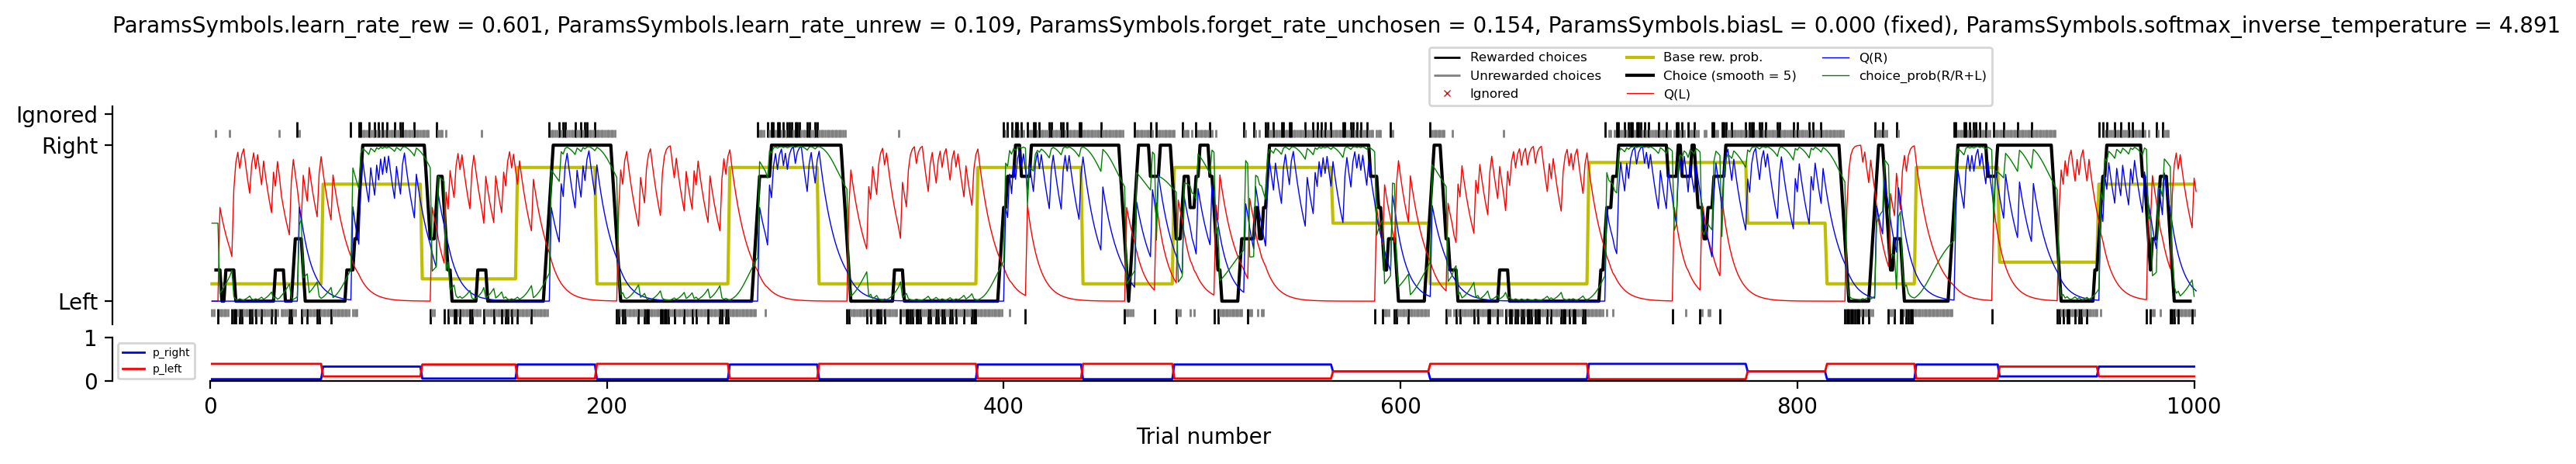

In [13]:
# Run the model
forager.perform(task)

# Get results
ground_truth_params = forager.params.model_dump()
ground_truth_choice_prob = forager.choice_prob
ground_truth_q_value = forager.q_value

# Evaluate the foraging efficiency
foraging_eff, foraging_eff_random_seed = compute_foraging_efficiency(
    baited=task.reward_baiting,
    choice_history=forager.get_choice_history(),
    reward_history=forager.get_reward_history(),
    p_reward=forager.get_p_reward(),
    random_number=task.random_numbers.T,
)

print(f"Foraging efficiency: {foraging_eff:.4f} (random seed: {foraging_eff_random_seed})")

local_metric, global_metric = compute_foraging_choice(
    choice_history=forager.get_choice_history(),
    reward_history=forager.get_reward_history(),
    p_reward=forager.get_p_reward(),
    global_calc=None
)

print(f'local_metric: {local_metric}, (global_metric: {global_metric})')

# Get history
choice_history = forager.get_choice_history()
reward_history = forager.get_reward_history()

# Plot session
fig, axes = forager.plot_session(if_plot_latent=True)

In [15]:
def run_model(n_iterations, task, forager):
    """
    Run model n_iterations and return foraging choice vector 
    """
    local_metrics = []
    global_metrics = []

    foraging_efficiency = []
    foraging_efficiency_random_seed = []

    for _ in range(n_iterations):
        # reset and run model
        forager.reset()
        forager.perform(task)

        # Calculate metrics
        local_metric, global_metric = compute_foraging_choice(
            choice_history=forager.get_choice_history(),
            reward_history=forager.get_reward_history(),
            p_reward=forager.get_p_reward(),
            global_calc=None
        )

        local_metrics.append(local_metric)
        global_metrics.append(global_metric)

        foraging_eff, foraging_eff_random_seed = compute_foraging_efficiency(
            baited=task.reward_baiting,
            choice_history=forager.get_choice_history(),
            reward_history=forager.get_reward_history(),
            p_reward=forager.get_p_reward(),
            random_number=task.random_numbers.T,
        )

        foraging_efficiency.append(foraging_eff)
        foraging_efficiency_random_seed.append(foraging_eff_random_seed)

    return np.array(local_metrics), np.array(global_metrics), np.array(foraging_efficiency), np.array(foraging_efficiency_random_seed)

In [16]:
n_iterations = 100

local_metrics, global_metrics, foraging_efficiency, foraging_efficiency_random_seed = run_model(n_iterations, task, forager)


local_metric: 0.4845 (std: 0.0876)
global_metric: 0.3543 (std: 0.0639)
foraging_efficiency: 0.7947 (std: 0.0369)
foraging_efficiency_random_seed: 0.8050 (std: 0.0298)


global_metric: 0.3543 (std: 0.0639)


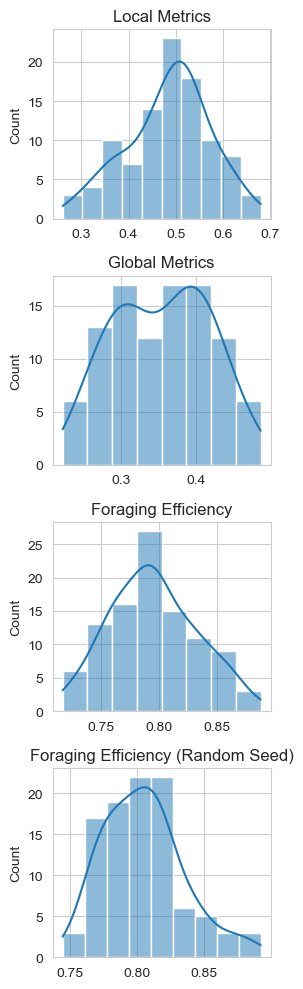

In [82]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(3, 10))

sns.histplot(x=local_metrics, kde=True, ax=ax1, label='local_metric')
ax1.set_title('Local Metrics')

print(f'global_metric: {global_metrics.mean():.4f} (std: {global_metrics.std():.4f})')
sns.histplot(x=global_metrics, kde=True, ax=ax2, label='global_metric')
ax2.set_title('Global Metrics')

sns.histplot(x=foraging_efficiency, kde=True, ax=ax3, label='foraging_efficiency')
ax3.set_title('Foraging Efficiency')

sns.histplot(x=foraging_efficiency_random_seed, kde=True, ax=ax4, label='foraging_efficiency_random_seed')
ax4.set_title('Foraging Efficiency (Random Seed)')

plt.tight_layout()


In [37]:
def param_sweep(task, forager, param_ranges=None):
    """
    Sweep over learning rates for metric evaluation

    Params:
    task: task environment
    forager: forager agent
    param_ranges (dict, optional): dictionary of parameter names and ranges to sweep over, if None use default ranges

    Returns:
    dict: Dictionary containing parameter combinations and corresponding metrics
    """
    if param_ranges is None:
        param_ranges = {
            'learn_rate_rew': np.linspace(0.1, 0.9, 5),
            'learn_rate_unrew': np.linspace(0.05, 0.3, 5),
            'forget_rate_unchosen': np.linspace(0.05, 0.3, 5)
        }

    results = []

    # Fixed parameters
    fixed_params = {
        'softmax_inverse_temperature': 5,
        'biasL': 0
    }

    # Iterate through parameters 
    for lr_rew in param_ranges['learn_rate_rew']:
        for lr_unrew in param_ranges['learn_rate_unrew']:
            for fr_unchosen in param_ranges['forget_rate_unchosen']:
                # Set parameters
                params = {
                    'learn_rate_rew': lr_rew,
                    'learn_rate_unrew': lr_unrew,
                    'forget_rate_unchosen': fr_unchosen,
                    **fixed_params
                }

                forager.reset()
                forager.params = forager.params.model_copy(update=params)
                forager.perform(task)

                # Calculate metrics 
                local_metric, global_metric = compute_foraging_choice(
                    choice_history=forager.get_choice_history(),
                    reward_history=forager.get_reward_history(),
                    p_reward=forager.get_p_reward(),
                    global_calc=None
                )

                foraging_eff, foraging_eff_random_seed = compute_foraging_efficiency(
                    baited=task.reward_baiting,
                    choice_history=forager.get_choice_history(),
                    reward_history=forager.get_reward_history(),
                    p_reward=forager.get_p_reward(),
                    random_number=task.random_numbers.T,
                )

                # Store results
                results.append({
                    'learn_rate_rew': lr_rew,
                    'learn_rate_unrew': lr_unrew,
                    'forget_rate_unchosen': fr_unchosen,
                    'local_metric': local_metric,
                    'global_metric': global_metric,
                    'foraging_efficiency': foraging_eff,
                    'foraging_efficiency_random_seed': foraging_eff_random_seed
                })

    return pd.DataFrame(results)


In [38]:
# Test on subset of ranges

custom_ranges = {
    'learn_rate_rew': np.linspace(0.01, 2, 30),
    'learn_rate_unrew': np.linspace(0.01, 2, 30),
    'forget_rate_unchosen': np.linspace(0.01, 2, 30)
}
# Run the parameter sweep
results_df = param_sweep(task, forager, custom_ranges)

In [40]:
results_df

,learn_rate_rew,learn_rate_unrew,forget_rate_unchosen,local_metric,global_metric,foraging_efficiency,foraging_efficiency_random_seed
0,0.01,0.01,0.010000,-0.013913,-0.014949,0.826223,0.812352
1,0.01,0.01,0.078621,0.050689,0.043929,0.836980,0.842233
2,0.01,0.01,0.147241,0.009634,0.016184,0.890247,0.848276
3,0.01,0.01,0.215862,0.080496,0.056122,0.839707,0.854321
4,0.01,0.01,0.284483,0.014212,0.010592,0.851568,0.847826
...,...,...,...,...,...,...,...
26995,2.00,2.00,1.725517,0.206840,0.134010,0.991738,0.944444
26996,2.00,2.00,1.794138,0.219992,0.158031,0.891489,0.904177
26997,2.00,2.00,1.862759,0.220242,0.130082,0.935526,0.927361
26998,2.00,2.00,1.931379,0.197840,0.128878,0.943861,0.894009


<Axes: xlabel='learn_rate_rew', ylabel='local_metric'>

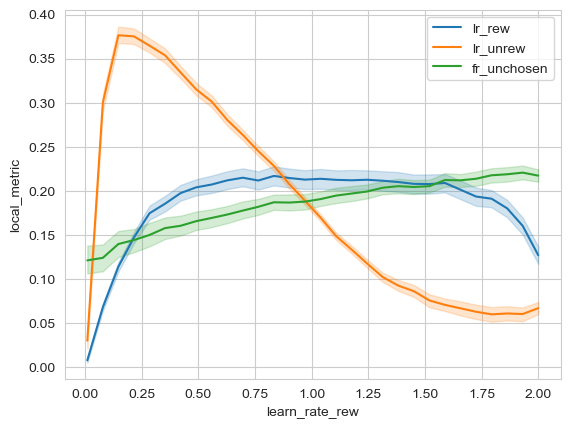

In [76]:
sns.lineplot(results_df, x='learn_rate_rew', y='local_metric', label='lr_rew')
sns.lineplot(results_df, x='learn_rate_unrew', y='local_metric', label='lr_unrew')
sns.lineplot(results_df, x='forget_rate_unchosen', y='local_metric', label='fr_unchosen')

<Axes: xlabel='learn_rate_rew', ylabel='foraging_efficiency'>

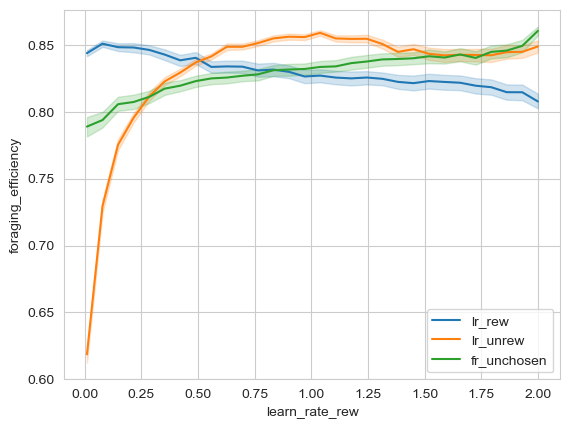

In [77]:
sns.lineplot(results_df, x='learn_rate_rew', y='foraging_efficiency', label='lr_rew')
sns.lineplot(results_df, x='learn_rate_unrew', y='foraging_efficiency', label='lr_unrew')
sns.lineplot(results_df, x='forget_rate_unchosen', y='foraging_efficiency', label='fr_unchosen')


                local_metric  global_metric
learn_rate_rew                             
0.010000            0.007702       0.005575
0.078621            0.068033       0.048602
0.147241            0.114077       0.082544
0.215862            0.147209       0.105772
0.284483            0.174595       0.126529
0.353103            0.185445       0.134370
0.421724            0.197483       0.141893
0.490345            0.203991       0.148649
0.558966            0.207225       0.148912
0.627586            0.211932       0.152166
0.696207            0.214935       0.155227
0.764828            0.211755       0.153282
0.833448            0.216962       0.155518
0.902069            0.214582       0.153910
0.970690            0.212771       0.153671
1.039310            0.213717       0.152033
1.107931            0.212533       0.152617
1.176552            0.212031       0.152086
1.245172            0.212617       0.153324
1.313793            0.211497       0.153185
1.382414            0.210035    

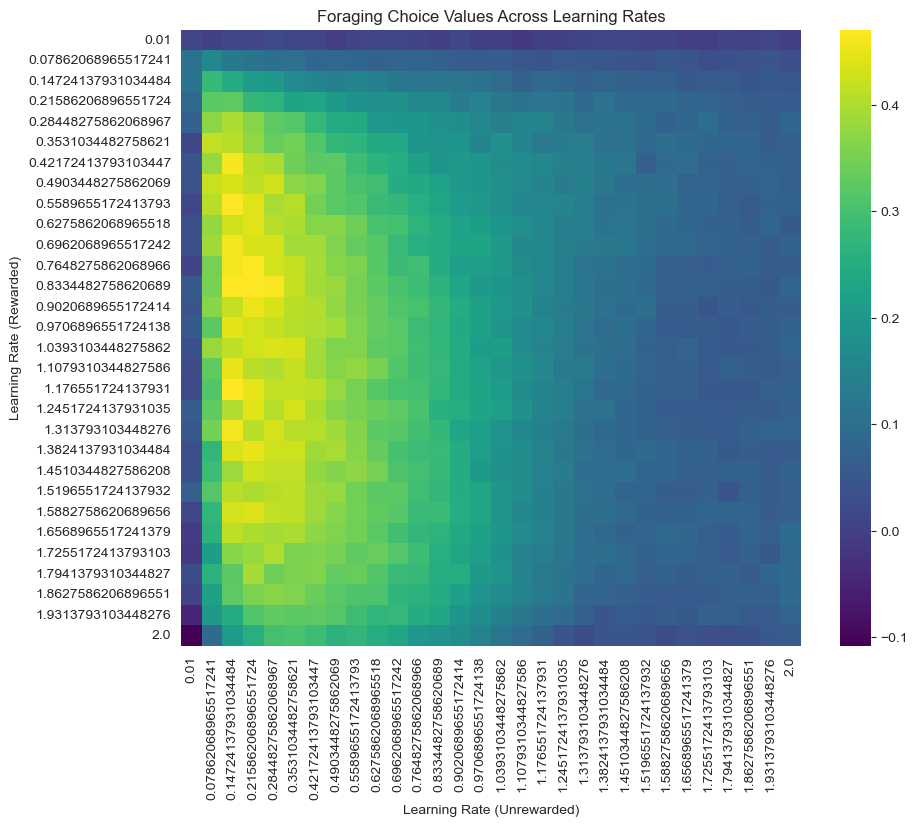

In [86]:
# Basic analysis of results

print(results_df.groupby('learn_rate_rew')[['local_metric', 'global_metric']].mean())

# Example heatmap for learn_rate_rew vs learn_rate_unrew (averaging over forget_rate)
pivot_table = results_df.pivot_table(
    values='local_metric', 
    index='learn_rate_rew',
    columns='learn_rate_unrew',
    aggfunc='mean'
)

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, cmap='viridis')
plt.title('Foraging Choice Values Across Learning Rates')
plt.xlabel('Learning Rate (Unrewarded)')
plt.ylabel('Learning Rate (Rewarded)')
plt.show()

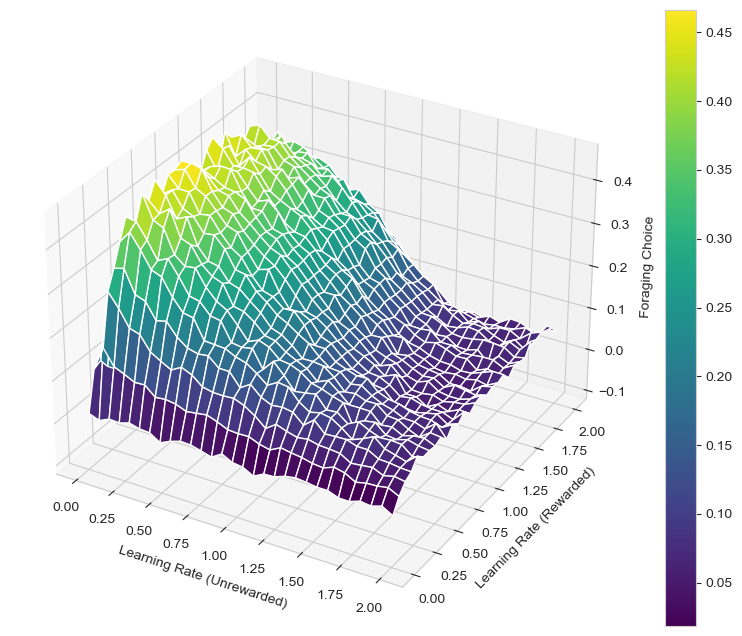

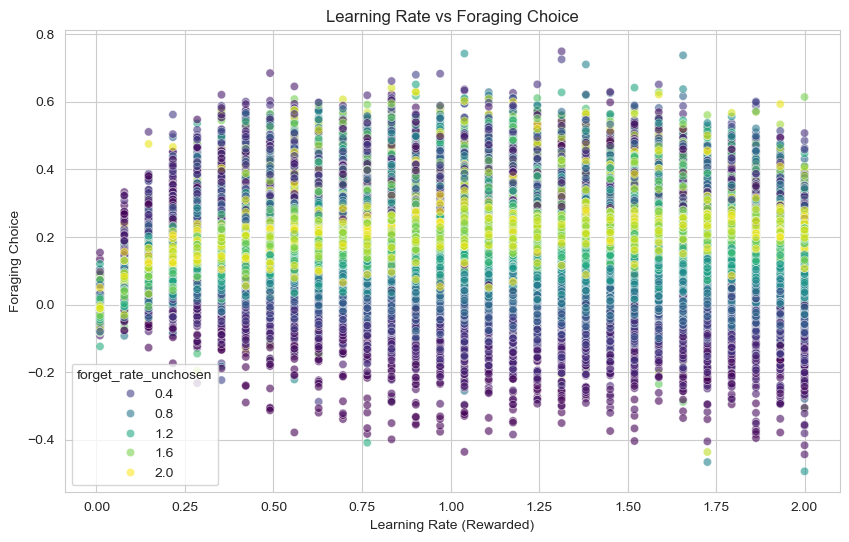

In [88]:
# Additional plots

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')

pivot = results_df.pivot_table(
    values='local_metric',
    index='learn_rate_rew', 
    columns='learn_rate_unrew',
    aggfunc='mean'
)
X, Y = np.meshgrid(pivot.columns, pivot.index)

surf = ax.plot_surface(X, Y, pivot.values, cmap='viridis')
ax.set_xlabel('Learning Rate (Unrewarded)')
ax.set_ylabel('Learning Rate (Rewarded)') 
ax.set_zlabel('Foraging Choice')
plt.colorbar(surf)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=results_df,
    x='learn_rate_rew',
    y='local_metric',
    hue='forget_rate_unchosen', 
    palette='viridis',
    alpha=0.6
)
plt.title('Learning Rate vs Foraging Choice')
plt.xlabel('Learning Rate (Rewarded)')
plt.ylabel('Foraging Choice')
plt.show()

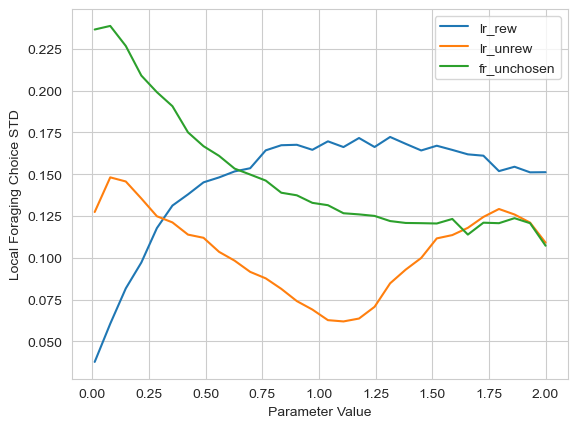

In [84]:
# Parameter sensitivity 
sensitivity = pd.DataFrame({
    'learn_rate_rew': results_df.groupby('learn_rate_rew')['local_metric'].std(),
    'learn_rate_unrew': results_df.groupby('learn_rate_unrew')['local_metric'].std(),
    'forget_rate': results_df.groupby('forget_rate_unchosen')['local_metric'].std()
})

sns.lineplot(sensitivity, x=sensitivity.index, y='learn_rate_rew', label='lr_rew')
sns.lineplot(sensitivity, x=sensitivity.index, y='learn_rate_unrew', label='lr_unrew')
sns.lineplot(sensitivity, x=sensitivity.index, y='forget_rate', label='fr_unchosen')
plt.xlabel('Parameter Value')
plt.ylabel('Local Foraging Choice STD')
plt.legend()
plt.show()


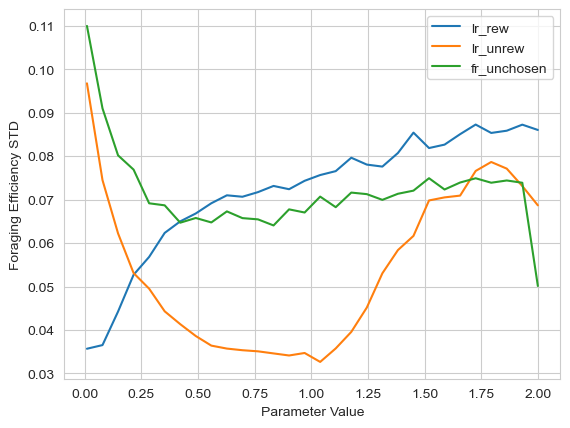

In [85]:
# Parameter sensitivity 
sensitivity_fe = pd.DataFrame({
    'learn_rate_rew': results_df.groupby('learn_rate_rew')['foraging_efficiency'].std(),
    'learn_rate_unrew': results_df.groupby('learn_rate_unrew')['foraging_efficiency'].std(),
    'forget_rate': results_df.groupby('forget_rate_unchosen')['foraging_efficiency'].std()
})

sns.lineplot(sensitivity_fe, x=sensitivity_fe.index, y='learn_rate_rew', label='lr_rew')
sns.lineplot(sensitivity_fe, x=sensitivity_fe.index, y='learn_rate_unrew', label='lr_unrew')
sns.lineplot(sensitivity_fe, x=sensitivity_fe.index, y='forget_rate', label='fr_unchosen')
plt.xlabel('Parameter Value')
plt.ylabel('Foraging Efficiency STD')
plt.legend()
plt.show()


In [6]:
# Parameter recovery 

# Fit model to recover parameters

forager.fit(
    choice_history,
    reward_history,
    fit_bounds_override = {'softmax_inverse_temperature': [0, 100]},
    clamp_params = {'biasL': 0},
    DE_kwargs = dict(workers=4, disp=True, seed=np.random.default_rng(42)),
    k_fold_cross_validation = None,
)

fitting_results = forager.fitting_result

2024-12-13 08:59:18,964 - aind_dynamic_foraging_models.generative_model.base - INFO - Fitting the model using the whole dataset...


differential_evolution step 1: f(x)= 289.0829807952948
differential_evolution step 2: f(x)= 278.66081064312925
differential_evolution step 3: f(x)= 271.07233761947083
differential_evolution step 4: f(x)= 271.07233761947083
differential_evolution step 5: f(x)= 271.07233761947083
differential_evolution step 6: f(x)= 267.7258166159626
differential_evolution step 7: f(x)= 267.7258166159626
differential_evolution step 8: f(x)= 267.7258166159626
differential_evolution step 9: f(x)= 261.55107374493673
differential_evolution step 10: f(x)= 261.1578133089714
differential_evolution step 11: f(x)= 261.1578133089714
differential_evolution step 12: f(x)= 259.92281388759886
differential_evolution step 13: f(x)= 258.0116776498438
differential_evolution step 14: f(x)= 258.0116776498438
differential_evolution step 15: f(x)= 258.0116776498438
differential_evolution step 16: f(x)= 258.0116776498438
differential_evolution step 17: f(x)= 258.0116776498438
differential_evolution step 18: f(x)= 258.011677649

In [7]:
# Check fitted parameters 
fit_names = fitting_results.fit_settings['fit_names']
ground_truth = [num for name, num in ground_truth_params.items() if name in fit_names]
print(f'Num of trials: {len(choice_history)}')
print(f'Fitted parameters: {fit_names}')
print(f'Ground truth: {[f"{num:.4f}" for num in ground_truth]}')
print(f'Fitted:       {[f"{num:.4f}" for num in fitting_results.x]}')
print(f"Likelihood-Per-Trial: {fitting_results.LPT}")
print(f"Prediction accuracy full dataset: {fitting_results.prediction_accuracy}\n")

Num of trials: 1000
Fitted parameters: ['learn_rate_rew', 'learn_rate_unrew', 'forget_rate_unchosen', 'softmax_inverse_temperature']
Ground truth: ['0.5000', '0.1000', '0.2000', '5.0000']
Fitted:       ['0.6011', '0.1087', '0.1544', '4.8908']
Likelihood-Per-Trial: 0.7732456884626638
Prediction accuracy full dataset: 0.902



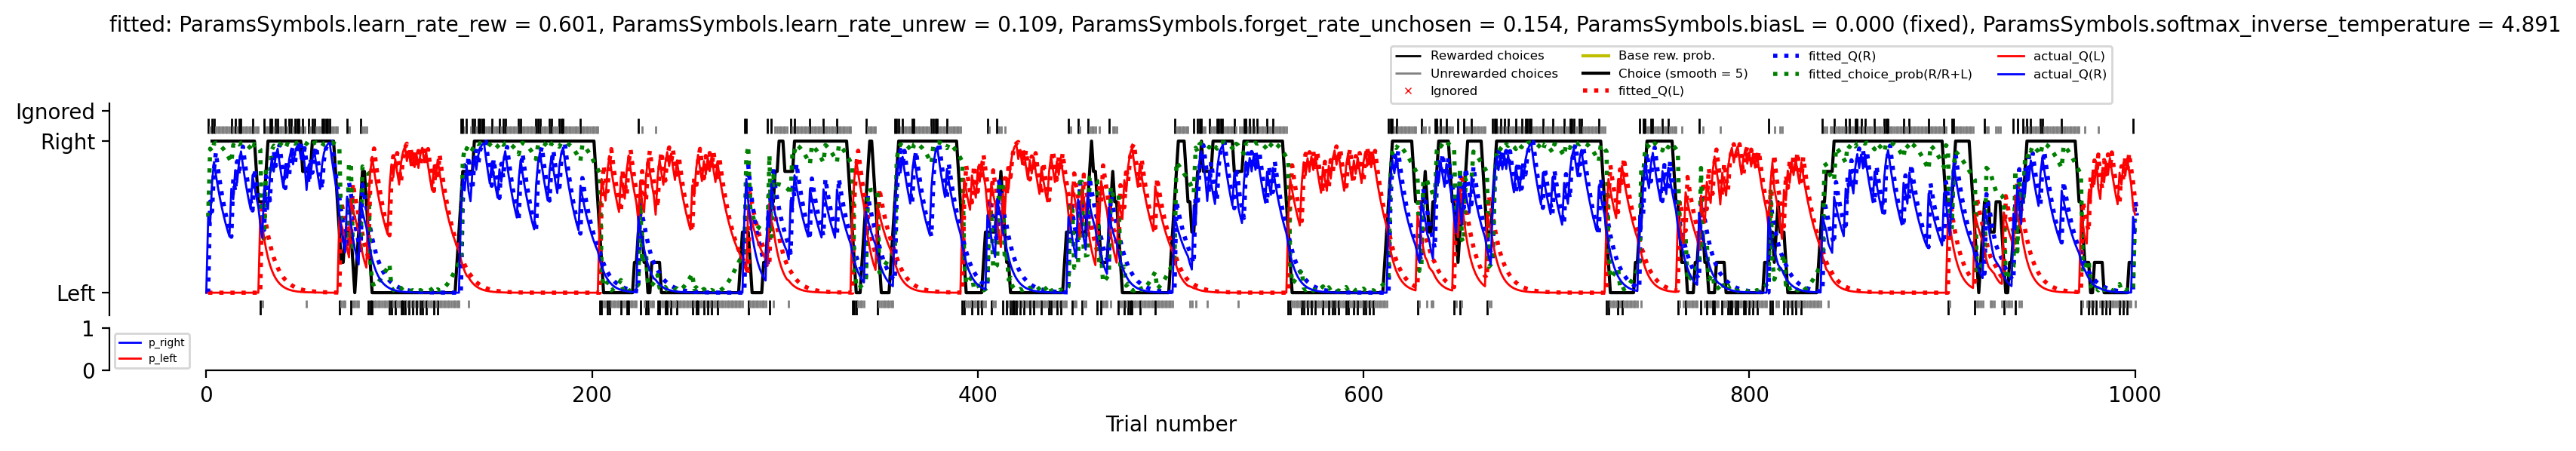

In [8]:
# Plot fitted session results

fig_fitting, axes = forager.plot_fitted_session(if_plot_latent=True)

# Overlay ground truth Q values
axes[0].plot(ground_truth_q_value[0], lw=1, color="red", ls="-", label="actual_Q(L)")
axes[0].plot(ground_truth_q_value[1], lw=1, color="blue", ls="-", label="actual_Q(R)")
axes[0].legend(fontsize=6, loc="upper left", bbox_to_anchor=(0.6, 1.3), ncol=4)